## Importando bibliotecas

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud 

## Leitura do dataset

In [2]:
olist_order_reviews = pd.read_csv('https://raw.githubusercontent.com/OtavioSotnas/AnaliseExploratoria-ADA-Santander/main/base%20de%20dados/olist_order_reviews_dataset.csv')

## Análise de comentários dos pedidos

In [3]:
olist_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Primeiro, criaremos nova coluna para categorizar a pontução do review como:
- True, se pontuação for boa (maior que 3);
- False, se pontuação for ruim (menor ou igual a 3).

In [58]:
# Criando nova coluna score > 3

score_gt_3 = np.array(olist_order_reviews['review_score'] > 3)
olist_order_reviews['score_gt_3'] = score_gt_3 

Usaremos o recurso de word clouds para avaliar as palavras mais citadas nos comentários de avaliações boas e ruins.

In [59]:
# Removendo comentários com valores faltantes

not_null_commments = olist_order_reviews.loc[~pd.isnull(olist_order_reviews['review_comment_message'])]

In [ ]:
# Filtrando comentários de acordo com coluna "score maior que 3"

good_scores = not_null_commments[olist_order_reviews['score_gt_3'] == True]
bad_scores = not_null_commments[olist_order_reviews['score_gt_3'] == False]

Para produzirmos word clouds com maior valor informativo, podemos remover as stop words, que são palavras comumente utilizadas em um idioma que carregam pouca informação analítica, como artigos (o, a, um), conjunções (e, mas, ou), pronomes (ela, dele), etc.

In [ ]:
# Utilizando stopwords da biblioteca nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

In [67]:
# Concatenando strings de comentários dos DataFrames em uma única string, para cada categoria

good_comments = good_scores['review_comment_message'].str.cat(sep=' ')
bad_comments = bad_scores['review_comment_message'].str.cat(sep=' ')

In [64]:
# Removendo stop words

good_comments_no_stop = ' '.join(word for word in good_comments.split() if word.lower() not in stop_words)
bad_comments_no_stop = ' '.join(word for word in bad_comments.split() if word.lower() not in stop_words)

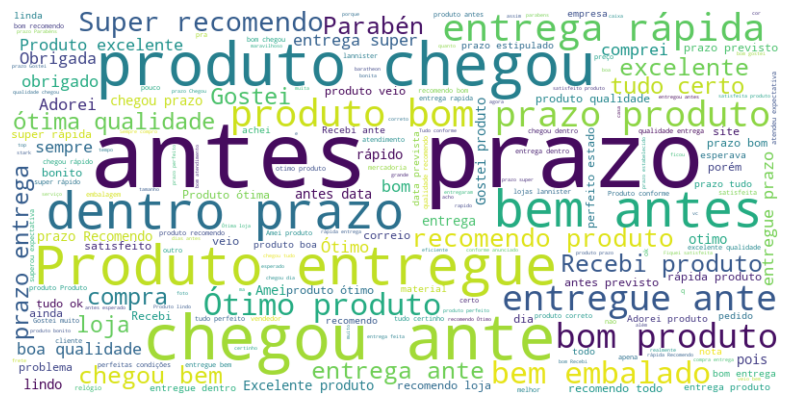

In [65]:
# Word cloud de comentários de produtos com boa avaliação

wordcloud_good = WordCloud(width=800, height=400, background_color='white').generate(good_comments_no_stop)

plt.figure(figsize=(15, 5))
plt.imshow(wordcloud_good, interpolation='bilinear')
plt.axis('off')
plt.show()

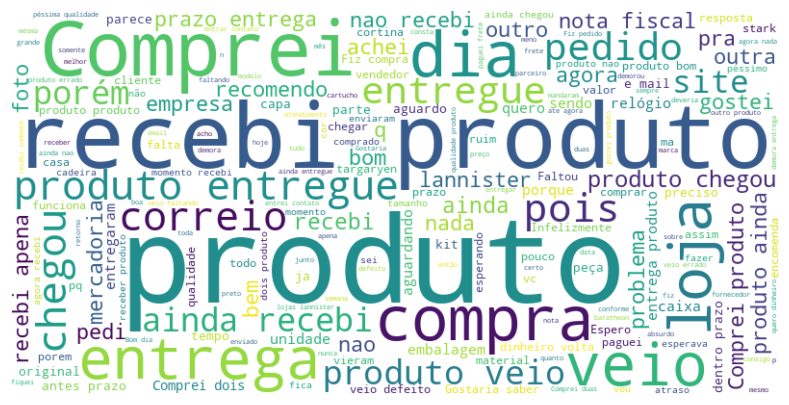

In [66]:
# Word cloud de comentários de produtos com avaliação ruim

wordcloud_bad = WordCloud(width=800, height=400, background_color='white').generate(bad_comments_no_stop)

plt.figure(figsize=(15, 5))
plt.imshow(wordcloud_bad, interpolation='bilinear')
plt.axis('off')
plt.show()